# Save History


Start training for input_vec:
[[0. 1. 2.]
 [0. 1. 2.]]
Feature set entries: 3
Epoch 1: Loss   = 389.6666666666667
Epoch 2: Loss   = 216.82547069020575
Epoch 3: Loss   = 161.41326835349574
Epoch 4: Loss   = 125.54600853022914
Epoch 5: Loss   = 95.54288048982966
Epoch 6: Loss   = 68.98978969633946
Epoch 7: Loss   = 47.118711362661145
Epoch 8: Loss   = 31.594309707528513
Epoch 9: Loss   = 22.421439984317143
Epoch 10: Loss   = 17.839100922606516
Epoch 11: Loss   = 15.72896679169825
Epoch 12: Loss   = 14.67006037744386
Epoch 13: Loss   = 13.992744484595002
Epoch 14: Loss   = 13.446110354144063
Epoch 15: Loss   = 12.948387913746416
Epoch 16: Loss   = 12.474782726545124
Epoch 17: Loss   = 12.017861843211229
Epoch 18: Loss   = 11.575222892279465
Epoch 19: Loss   = 11.145899726277724
Epoch 20: Loss   = 10.729347309245876
Epoch 21: Loss   = 10.325157779059358
Epoch 22: Loss   = 9.932979986280385
Epoch 23: Loss   = 9.55249537819732
Epoch 24: Loss   = 9.183409595219244
Epoch 25: Loss   = 8.8254485

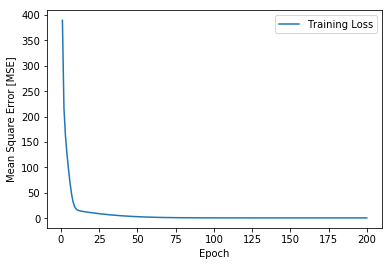

,epoch,loss
190,191,0.500029
191,192,0.500027
192,193,0.500025
193,194,0.500023
194,195,0.500021
195,196,0.500019
196,197,0.500018
197,198,0.500016
198,199,0.500015
199,200,0.500014


In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import metrics

#added
def get_data( data_variant ):
  if (data_variant == "D2_N1_Y1"):
    X  = np.array([[1], [1]])
    y_true =np.array( [[22]] )

  elif (data_variant == "D2_N2_Y1"):
    X  = np.array( [[0.,1.], [0.,1.]] ) 
    y_true = np.array( [[0., 7.]] )

  elif (data_variant == "D2_N3_Y1"):
    X  = np.array( [[0.,1., 2.0], [0.,1., 2.0]] ) 
    y_true = np.array( [[-10., -11., -15.0]] )

  else: 
    raise Exception(f'Unkown datasource:  {data_variant}')

  return(X, y_true)

      

def activation(z, act_func):
    global _activation
    if act_func == 'relu':
       return np.maximum(z, np.zeros(z.shape))
    
    elif act_func == 'sigmoid':
      return 1.0/(1.0 + np.exp( -z ))

    elif act_func == 'linear':
        return z
    else:
        raise Exception('Activation function is not defined.')


def get_dactivation(A, act_func):
    if act_func == 'relu':
        return np.maximum(np.sign(A), np.zeros(A.shape)) # 1 if backward input >0, 0 otherwise; then diaganolize

    elif act_func == 'sigmoid':
        h = activation(A, 'sigmoid')
        return h *(1-h)

    elif act_func == 'linear':
        return np.ones(A.shape)

    else:
        raise Exception('Activation function is not defined.')

def loss(y_true, y_predicted, loss_function='mse'):
   if loss_function == 'mse':
      return metrics.mean_squared_error( y_true, y_predicted)
   else:
      raise Exception('Loss metric is not defined.')


def get_dZ_from_loss(y, y_predicted, metric):
    if metric == 'mse':
        return y_predicted - y
    else:
        raise Exception('Loss metric is not defined.')

        
class layer:
  def __init__(self,input_dim, output_dim, activation='relu'):    
    self.activation = activation
    self.input_dim = input_dim
    self.output_dim = output_dim # is this needed?? TODO
    if input_dim > 0:
      self.b = np.ones( (output_dim,1) )       
      self.W = np.ones( (output_dim, input_dim) )
      #self.W = np.random.randn(output_dim, input_dim) * np.sqrt(2/input_dim) 
    
    self.A = np.zeros( (output_dim,1) ) # added: we temp. store for A
  
  def setWeight(self, W ):
    self.W = W
    
  def setBias(self, b ):
    self.b = b
    
  def setActivation(self, A ): 
    self.Z =  np.add( np.dot(self.W, A), self.b)
    self.A =  activation(self.Z, self.activation)
  
  
  def print(self, layer_name=""):
    print(f"Layer {layer_name}: Begin of Summary")
    if self.input_dim > 0:
      print(f"Layer {layer_name}: input_dim = {self.input_dim}")
      print(f"Layer {layer_name}: output_dim = {self.output_dim}")
      print(f"Layer {layer_name}: Activation = {self.activation}")
      print(f"W = ")
      print(self.W)
      print(f"A = ")
      print(self.A)
      print(f"b = ")
      print(self.b)
    else:
      print(f"Layer {layer_name}: This is an input layer..... ")
      print(f"A = ")
      print(self.A)
  
    print(f"Layer {layer_name}: End of Summary")
  

class ModelNet:
  def __init__(self, input_dim):  
    self.history = []
    self.neural_net = []
    self.neural_net.append(layer(0 , input_dim, 'irrelevant'))
    
  def addLayer(self, nr_neurons, activation='relu'):    
    layer_index = len(self.neural_net)
    input_dim = self.neural_net[layer_index - 1].output_dim
    new_layer = layer( input_dim, nr_neurons, activation)
    self.neural_net.append( new_layer )
    
  #added  
  def get_history(self):
     return pd.DataFrame(
         self.history, 
         columns=['epoch', 'loss']
     )         

  def forward_propagation(self, input_vec ):
    self.neural_net[0].A = input_vec
    for layer_index in range(1,len(self.neural_net)):    
      _A_Prev = self.neural_net[layer_index-1].A                       
      self.neural_net[layer_index].setActivation( _A_Prev )
      
    return  self.neural_net[layer_index].A
    
    
  def fit(self, input_vec, y_true, max_epoch, learning_rate=0.01, verbose=1 ):
    print(f"Start training for input_vec:")
    print( input_vec)
    print(f"Feature set entries: {input_vec.shape[1]}")
    
    self.history = []  # Reset History Array
    num_train_datum = input_vec.shape[1]
    for epoch in range(1,max_epoch+1):    
     
      # Generate y_predicted
      y_predicted = self.forward_propagation( input_vec )


      # Do Backpropagation
      self.backward_propagation( y_true, y_predicted,  num_train_datum, verbose = verbose - 1 )

      #calculate intermediate loss
      cost = loss(y_true, y_predicted)

      # Update history
      self.history.append([epoch, cost])

      # Update the weights an biases
      self.update( learning_rate )

      if (verbose > 0):
        #print(f"Epoch {epoch}: Y-True = {y_true}")
        #print(f"Epoch {epoch}: Y-Pred = {y_predicted}")
        print(f"Epoch {epoch}: Loss   = { cost }")
        #print(f"Epoch {epoch}: Finished")

    print(f"Epoch {epoch}: Y-True = {y_true}")
    print(f"Epoch {epoch}: Y-Pred = {y_predicted}")
    print(f"Epoch {epoch}: Loss = {loss(y_true, y_predicted)}")    
    print(f"Epoch {epoch}: Finished")
      
      
  def backward_propagation(self, y, y_predicted, num_train_datum, metric='mse', verbose=0):
    nr_layers = len(self.neural_net)
    for layer_index in range(nr_layers-1,0,-1):
        if layer_index+1 == nr_layers: # if output layer
            dZ = get_dZ_from_loss(y, y_predicted, metric)
        else: 
            dZ = np.multiply(
                   np.dot(
                       self.neural_net[layer_index+1].W.T, 
                       dZ), 
                   get_dactivation(
                         self.neural_net[layer_index].A, 
                         self.neural_net[layer_index].activation)
                   )
           
        
        dW = np.dot(dZ, self.neural_net[layer_index-1].A.T) / num_train_datum
        db = np.sum(dZ, axis=1, keepdims=True) / num_train_datum
        
        self.neural_net[layer_index].dW = dW
        self.neural_net[layer_index].db = db
        if (verbose > 0):
          print(f"\n\n====== Backward Propagation Layer {layer_index} =======")
          print(f"dZ      =  {dZ}")          
          print(f"dW      =  {dW}")
          print(f"A-1     = {self.neural_net[layer_index-1].A}") 
          print(f"\nb     =  {db}")
             

  def update( self, learning_rate ):
    nr_layers = len(self.neural_net)
    for layer_index in range(1,nr_layers):        # update (W,b)
      self.neural_net[layer_index].W = self.neural_net[layer_index].W - learning_rate * self.neural_net[layer_index].dW  
      self.neural_net[layer_index].b = self.neural_net[layer_index].b - learning_rate * self.neural_net[layer_index].db

  def summary(self):
      print("MODEL SUMMARY")
      for layer_index in range(len(self.neural_net)):        
        self.neural_net[layer_index].print(layer_index)
        
      print("FINISHED MODEL SUMMARY")
      

# Test

In [7]:
input_dim = 2
output_dim = 1
model = ModelNet( input_dim )
model.addLayer( 2, 'relu' )
model.addLayer( output_dim, 'linear' )

(X, y_true ) = get_data( "D2_N3_Y1")

model.fit( X, y_true, 200, earlystop= 1, learning_rate = 0.01, verbose=0)
history = model.get_history()
print( history.tail(10) )

TypeError: ignored

#Visualize History

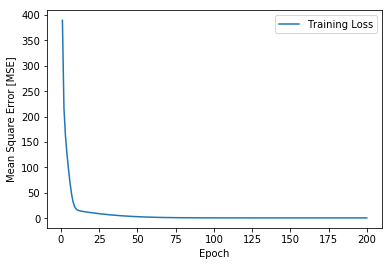

In [6]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [MSE]')
plt.plot(history['epoch'], history['loss'], label='Training Loss')
#plt.ylim([0,1])  
plt.legend()
plt.show()